In [ ]:
import json
import urllib.request
import pandas as pd

# THE API CALL:
apiURL = "https://opendata.camden.gov.uk/resource/ndrn-zq36.json?$select=name_1,local_type,district_borough,easting,northing,longitude,latitude"

# TRIGGER THE API CALL:
with urllib.request.urlopen(apiURL) as dataGet:
    # STORE RECORDS IN JSON OBJECT:
    dataResponse = json.load(dataGet)

# GET THE NUMBER OF RECORDS:
dataResults = len(dataResponse)


print(dataResults)

print(dataResponse[0])

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(dataResponse)

# Print the DataFrame
print(df.head())

print(df.columns)

In [18]:
import folium

df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')


m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

for idx, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name_1']).add_to(m)

# Display the map
m


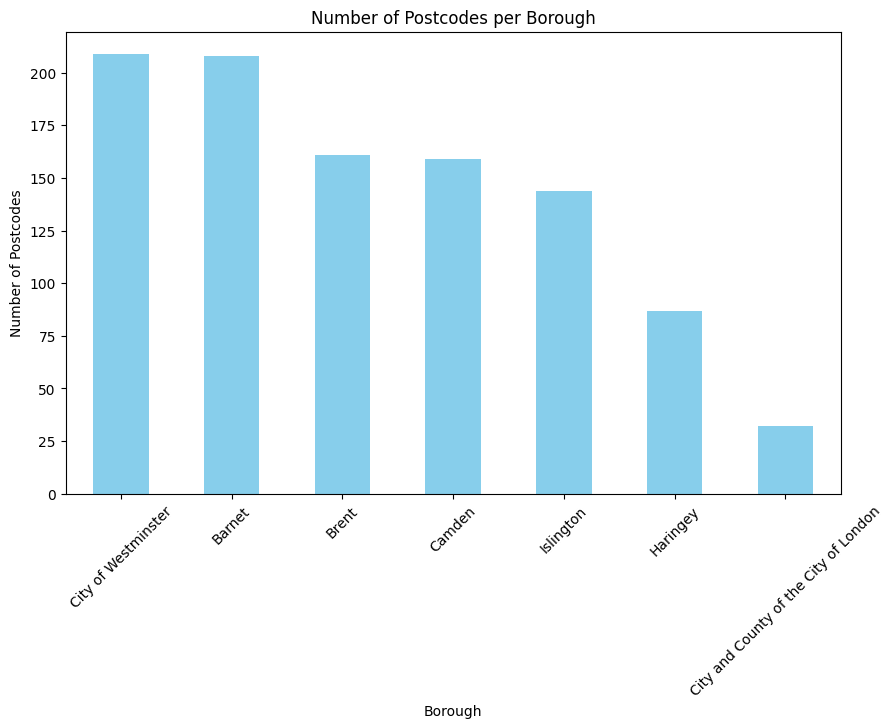

In [19]:
borough_counts = df['district_borough'].value_counts()

plt.figure(figsize=(10, 6))
borough_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Postcodes per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Postcodes")
plt.xticks(rotation=45)
plt.show()


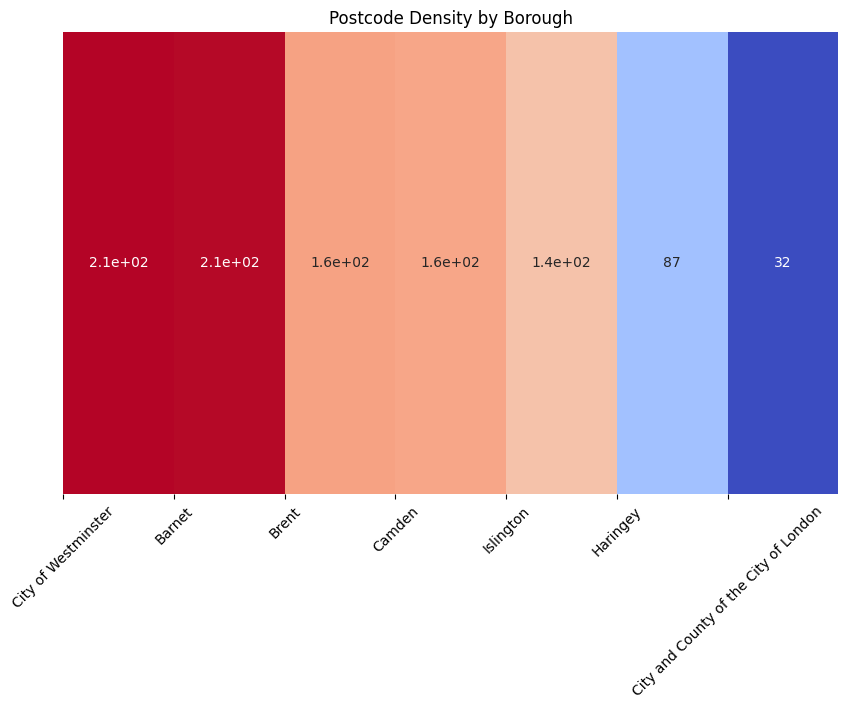

In [20]:
import seaborn as sns

# Count the number of postcodes in each borough
borough_counts = df['district_borough'].value_counts()

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(borough_counts.values.reshape(1, -1), annot=True, cmap="coolwarm", cbar=False)
plt.title("Postcode Density by Borough")
plt.yticks([])
plt.xticks(range(len(borough_counts)), borough_counts.index, rotation=45)
plt.show()


In [21]:
# City center coordinates (London city center)
city_center = (51.5074, -0.1278)

# Calculate distances from city center
df['distance_to_center_in_km'] = df.apply(
    lambda row: round(geodesic(city_center, (row['latitude'], row['longitude'])).km,2), axis=1)

# Show the distances
print(df[['name_1', 'distance_to_center_in_km']])


               name_1  distance_to_center_in_km
0             N17 8HF                     11.57
1             EN4 9JT                     15.86
2             W1W 5DD                      2.14
3              N1 8SD                      4.19
4             NW3 6EH                      6.07
..                ...                       ...
995            N5 2LU                      6.37
996        Percy Road                     12.55
997  Cranesbill Close                     13.10
998           NW1 3SG                      2.67
999           NW3 7HN                      7.67

[1000 rows x 2 columns]


C:\Users\ANJANA PK\AppData\Local\Temp\ipykernel_10524\690098191.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_distances = df.groupby('district_borough').apply(avg_distance_within_borough)


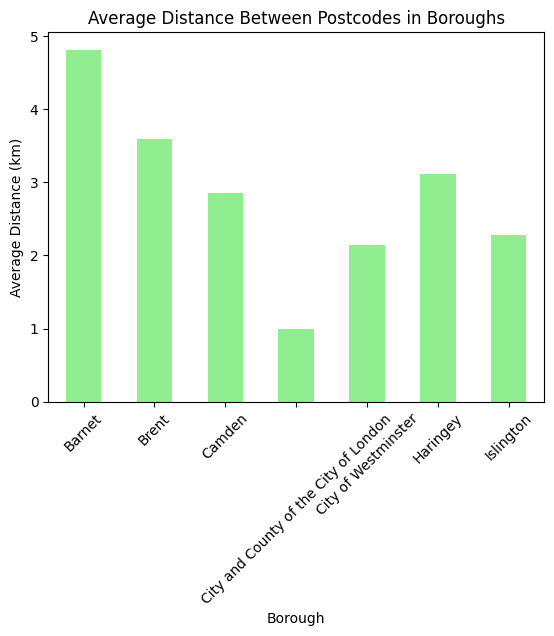

In [23]:
# Group by borough and calculate the average distance between postcodes within each borough
def avg_distance_within_borough(borough_df):
    distances = []
    for i in range(len(borough_df)):
        for j in range(i + 1, len(borough_df)):
            coord1 = (borough_df.iloc[i]['latitude'], borough_df.iloc[i]['longitude'])
            coord2 = (borough_df.iloc[j]['latitude'], borough_df.iloc[j]['longitude'])
            distances.append(calculate_distance(coord1, coord2))
    return np.mean(distances)

# Apply this function to each borough
avg_distances = df.groupby('district_borough').apply(avg_distance_within_borough)

# Plot the average distances
avg_distances.plot(kind='bar', color='lightgreen')
plt.title("Average Distance Between Postcodes in Boroughs")
plt.xlabel("Borough")
plt.ylabel("Average Distance (km)")
plt.xticks(rotation=45)
plt.show()
